In [19]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# load the Dataset
data = pd.read_csv('insurance.csv')

In [23]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
#Check for missing values 
print ("Missing Values:\n", data.isnull().sum())

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [27]:
# first 5 rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Number of Records and columns:

In [38]:
data.shape

(1338, 7)

# List of Columns:

In [41]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Datatype:

In [44]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Data information:

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check For Duplicate:

In [52]:
data.duplicated().any()

True

In [54]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [56]:
data1 = data.drop_duplicates()

In [60]:
data1.shape

(1337, 7)

In [62]:
# Check For missing Values:
data1.isnull().any

<bound method DataFrame.any of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1337 rows x 7 columns]>

In [64]:
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [66]:
# List of Categoric and Numeric Columns:
Numeric_columns = data1.select_dtypes(include="number").columns.to_list()
Categoric_columns = data1.select_dtypes(exclude="number").columns.to_list()
print(f"Numeric columns in the data : {Numeric_columns}")
print(f"Categoric columns in the data : {Categoric_columns}")

Numeric columns in the data : ['age', 'bmi', 'children', 'charges']
Categoric columns in the data : ['sex', 'smoker', 'region']


In [76]:
# Statistics Summary Of numeric Columns
data1.describe(include="number")

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [78]:
# Statistics Summary Of  Category Columns
data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [86]:
data1.sex.unique()

array(['female', 'male'], dtype=object)

In [88]:
data1.sex.nunique()

2

In [90]:
data1.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [94]:
print(data1.region.unique())
print()
print(data1.region.nunique())
print()
print(data1.region.value_counts())

['southwest' 'southeast' 'northwest' 'northeast']

4

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [96]:
Numeric_columns

['age', 'bmi', 'children', 'charges']

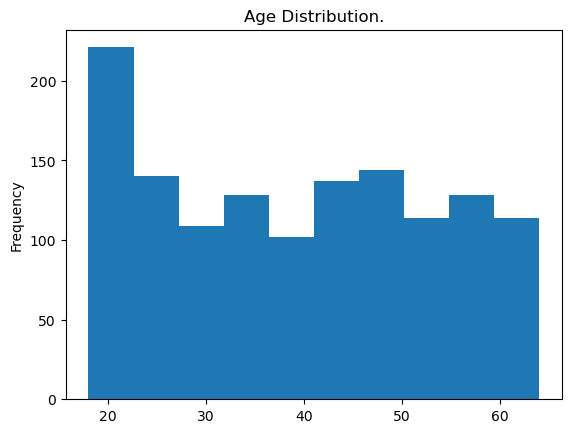

In [98]:
# Histogram For Numeric Columns
data1['age'].plot(kind = 'hist')
plt.title("Age Distribution.")
plt.show()

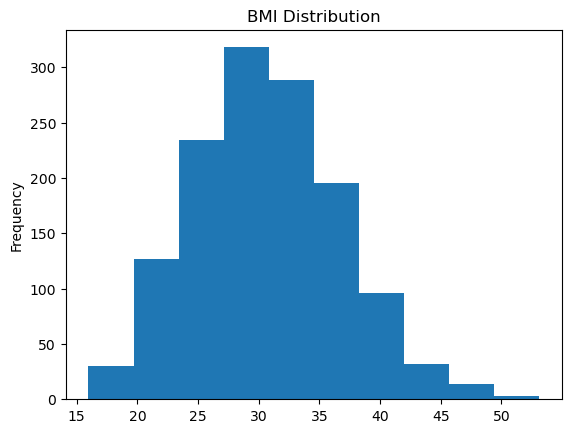

In [100]:
data1['bmi'].plot(kind = 'hist')
plt.title("BMI Distribution")
plt.show()

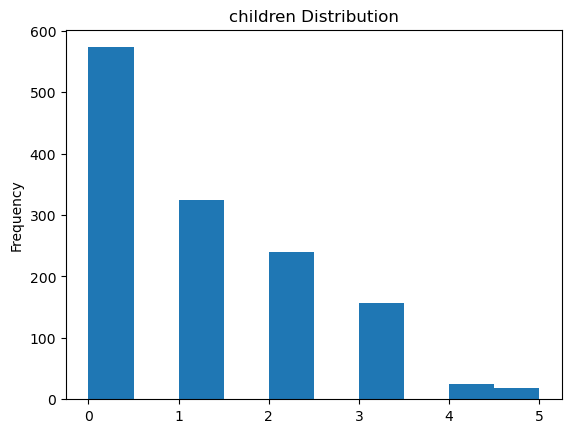

In [106]:
data1['children'].plot(kind = 'hist')
plt.title("children Distribution")
plt.show()

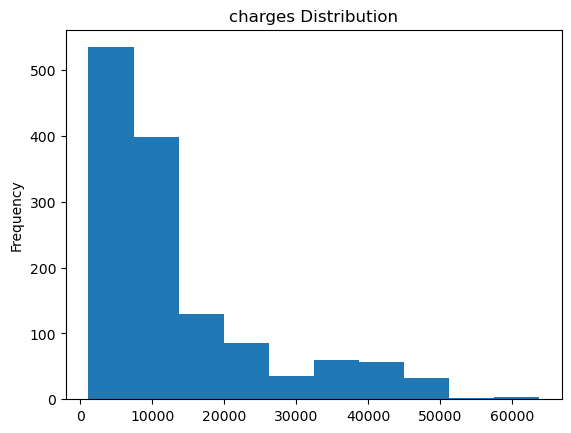

In [104]:
data1['charges'].plot(kind = 'hist')
plt.title("charges Distribution")
plt.show()

<Axes: xlabel='children'>

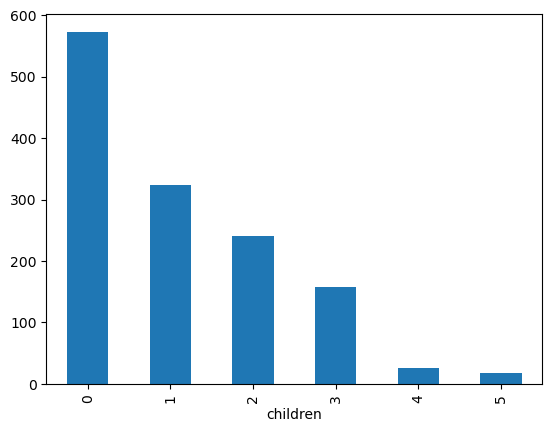

In [116]:
# bar chart Categoric Columns
data1["children"].value_counts().plot(kind= 'bar')

<Axes: xlabel='sex'>

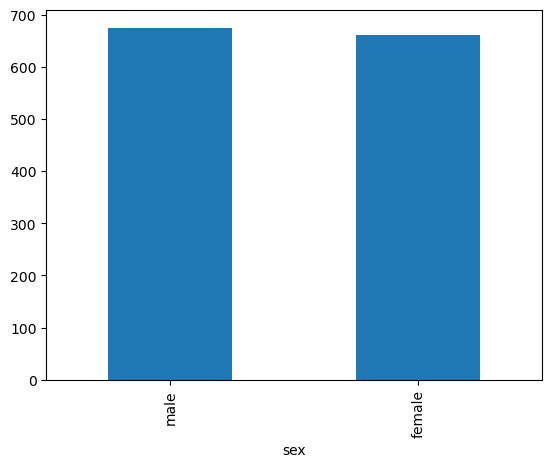

In [118]:
data1["sex"].value_counts().plot(kind= 'bar')

<Axes: xlabel='region'>

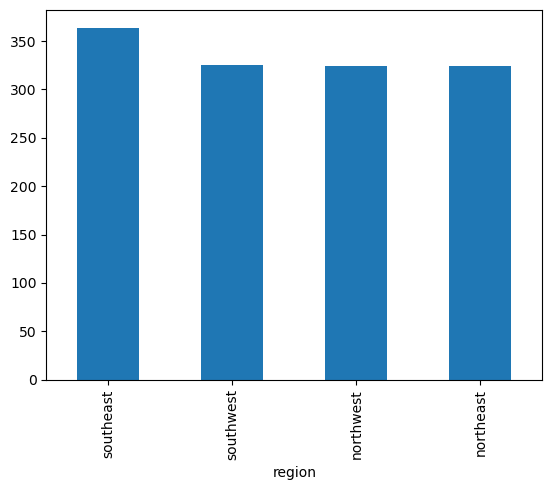

In [120]:
data1["region"].value_counts().plot(kind= 'bar')

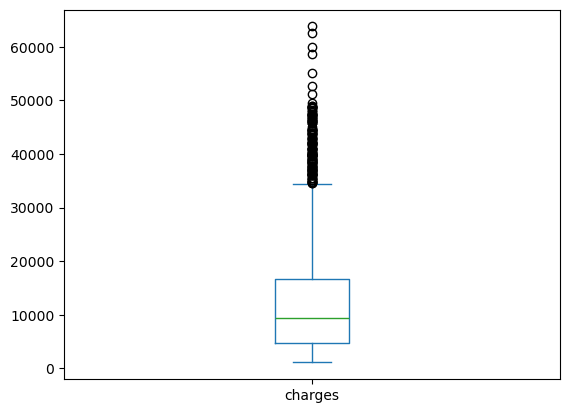

In [122]:
# Box Plot for nuneric Columns
data1['charges'].plot(kind = 'box')
plt.show()

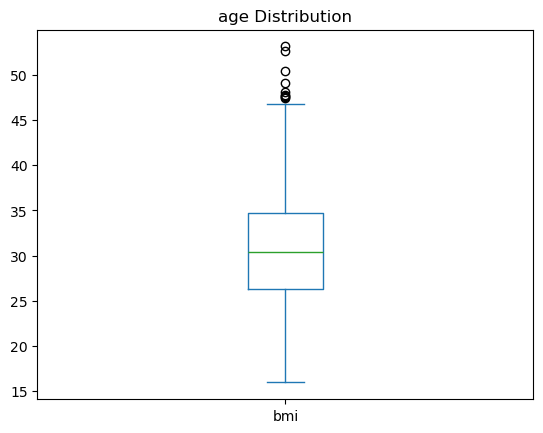

In [124]:
data1['bmi'].plot(kind = 'box')
plt.title("age Distribution")
plt.show()

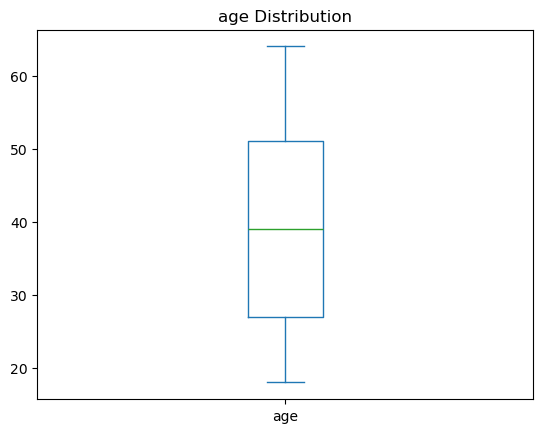

In [126]:
data1['age'].plot(kind = 'box')
plt.title("age Distribution")
plt.show()

In [128]:
region_count = data1["region"].value_counts()
region_count


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

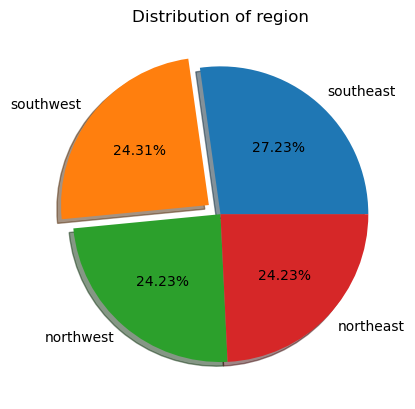

In [130]:
plt.pie(labels=region_count.index,
       x=region_count.values,
       shadow=True,
       autopct = '%.2f%%',
       explode = (0, 0.1, 0, 0))
plt.title("Distribution of region")
plt.show()

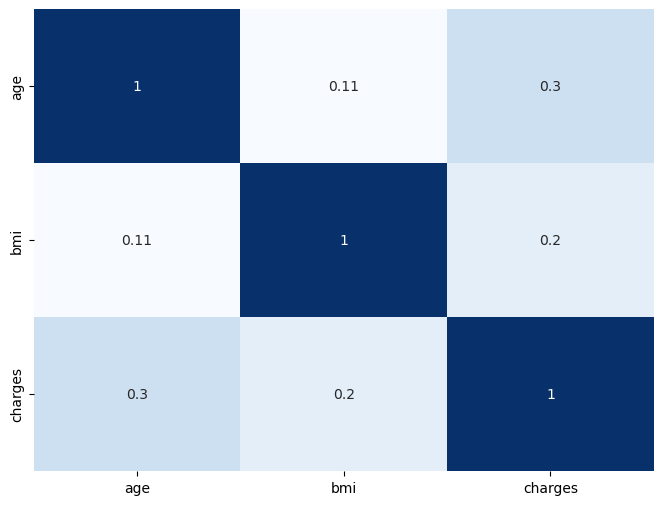

In [132]:
# correlation Matrix
corr_data = data[["age", "bmi", "charges"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(round(corr_data, 2), annot=True, cmap="Blues", cbar=False)
plt.show()

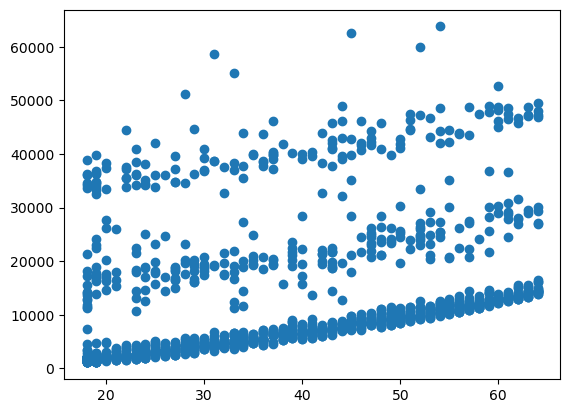

In [134]:
# Scatter plot
plt.scatter(data = data1, x = 'age', y = 'charges')

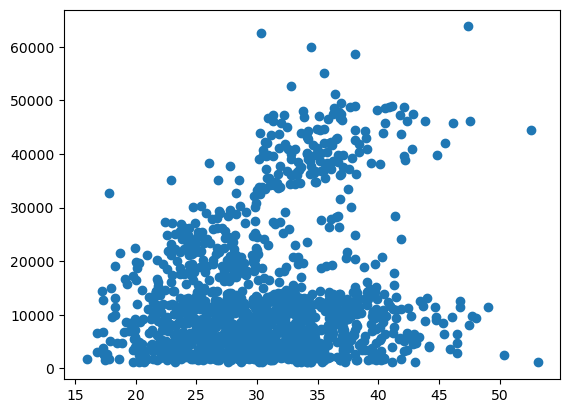

In [136]:
plt.scatter(data = data1, x = 'bmi', y = 'charges')

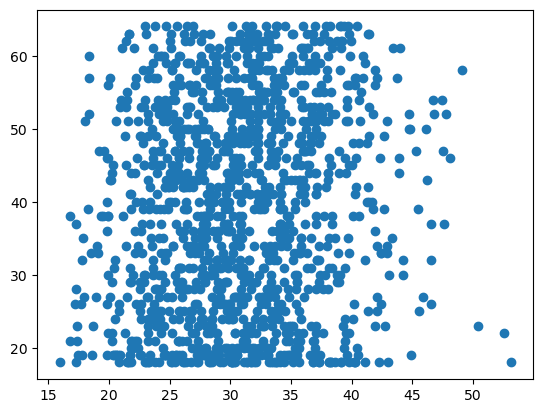

In [138]:
plt.scatter(data = data1, x = 'bmi', y = 'age')

In [140]:
# Insurance Cost for Smoker and Non- Smoker
smoker_data = data1.groupby("smoker")["charges"].mean().reset_index()
smoker_data

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

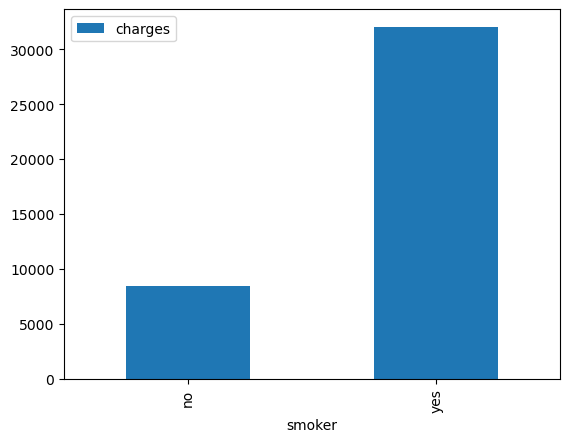

In [144]:
smoker_data.plot(kind = 'bar', x = 'smoker', y = 'charges')

In [146]:
# Insurance cost for male and female
gender_data = data1.groupby("sex")["charges"].mean().reset_index()
gender_data

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

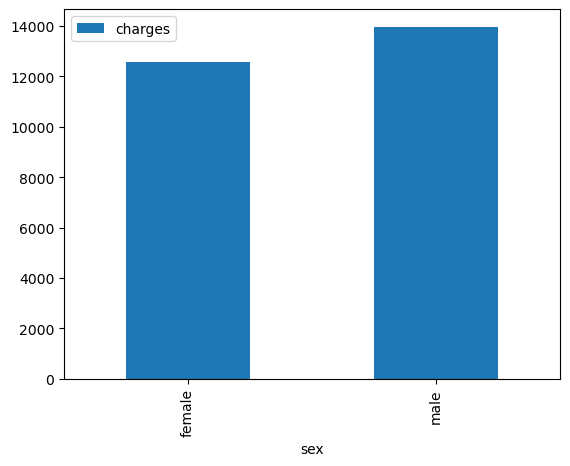

In [150]:
gender_data.plot(kind = 'bar', x = 'sex', y = 'charges')

In [152]:
#region wise insurance cost
region_data = data1.groupby("region")["charges"].mean().reset_index()
region_data

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

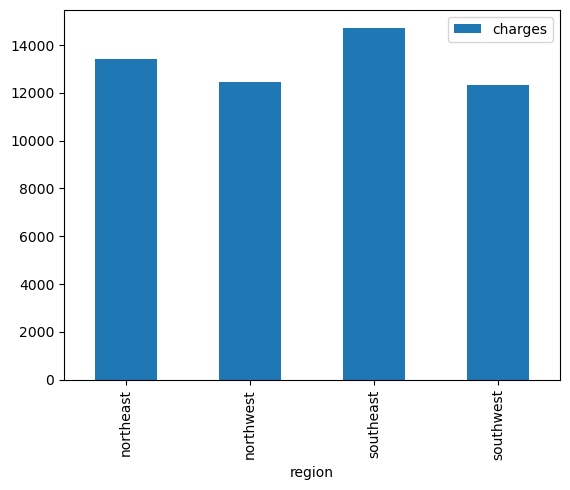

In [154]:
region_data.plot(kind = 'bar', x = 'region', y = 'charges')

In [156]:
# region wise bmi
region_bmi_data = data1.groupby("region")["bmi"].mean().reset_index()
region_bmi_data

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

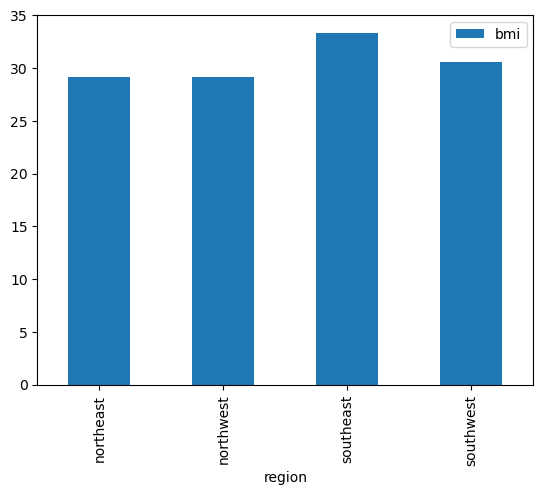

In [158]:
region_bmi_data.plot(kind = 'bar', x = 'region', y = 'bmi')

In [162]:
# region wise male and female and cost
pd.crosstab(data1.region, data1.sex).count()

sex
female    4
male      4
dtype: int64

In [164]:
data1.groupby(["region", 'sex'])['sex'].count()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      160
southeast  female    175
           male      189
southwest  female    162
           male      163
Name: sex, dtype: int64